Predicting which station needs more docks on the basis of the traffic ( to and fro) at the station. This is also by keeping in mind the revenue generated v/s the cost required to build more docks

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc, os


Combine bicycle data with station data and merge all years data

In [4]:
#Training Data
trip_2017_q1 = pd.read_csv("C:/DPA Project/data/Divvy_Trips_2017_Q1.csv")
trip_2017_q2 = pd.read_csv("C:/DPA Project/data/Divvy_Trips_2017_Q2.csv")
trip_2017_q3 = pd.read_csv("C:/DPA Project/data/Divvy_Trips_2017_Q3.csv")
trip_2017_q4 = pd.read_csv("C:/DPA Project/data/Divvy_Trips_2017_Q4.csv")

merge_2017 = pd.concat([trip_2017_q1, trip_2017_q2, trip_2017_q3, trip_2017_q4],ignore_index= True)
merge_2017 = merge_2017.reindex(index=[i for i in range(merge_2017.shape[0])])

#trip_2018_q1 = pd.read_csv("C:/DPA Project/data/Divvy_Trips_2018_Q1.csv")
trip_2018_q2 = pd.read_csv("C:/DPA Project/data/Divvy_Trips_2018_Q2.csv")
trip_2018_q3 = pd.read_csv("C:/DPA Project/data/Divvy_Trips_2018_Q3.csv")
trip_2018_q4 = pd.read_csv("C:/DPA Project/data/Divvy_Trips_2018_Q4.csv")

merge_2018 = pd.concat([trip_2018_q2, trip_2018_q3, trip_2018_q4],ignore_index= True)
merge_2018 = merge_2018.reindex(index=[i for i in range(merge_2018.shape[0])])



#Test Data
trip_2019_q1 = pd.read_csv("C:/DPA Project/data/Divvy_Trips_2019_Q1.csv")
trip_2019_q2 = pd.read_csv("C:/DPA Project/data/Divvy_Trips_2019_Q2.csv")
trip_2019_q3 = pd.read_csv("C:/DPA Project/data/Divvy_Trips_2019_Q3.csv")
trip_2019_q4 = pd.read_csv("C:/DPA Project/data/Divvy_Trips_2019_Q4.csv")

merge_2019 = pd.concat([trip_2019_q1, trip_2019_q2, trip_2019_q3, trip_2019_q4],ignore_index= True)
merge_2019 = merge_2019.reindex(index=[i for i in range(merge_2019.shape[0])])
merge_2019_orig = merge_2019.reindex(index=[i for i in range(merge_2019.shape[0])])

#Total Data pf 2017 & 2018
merge_total = pd.concat([merge_2017, merge_2018],ignore_index= True)
merge_total = merge_total.reindex(index=[i for i in range(merge_total.shape[0])])
merge_total_orig = merge_total.reindex(index=[i for i in range(merge_total.shape[0])])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [5]:
station_data = pd.read_csv("C:/DPA Project/data/Divvy_Bicycle_Stations.csv")

In [6]:
#Merging Total Docks, To Latitude & To Longitude Data in Test Dataframe
merge_2019['total_docks'] =  merge_2019['from_station_id'].map(station_data.set_index('ID')['Total Docks'])
merge_2019['to_latitude'] = merge_2019['to_station_id'].map(station_data.set_index('ID')['Latitude'])
merge_2019['to_longitude'] = merge_2019['to_station_id'].map(station_data.set_index('ID')['Longitude'])
merge_2019['from_latitude'] = merge_2019['from_station_id'].map(station_data.set_index('ID')['Latitude'])
merge_2019['from_longitude'] = merge_2019['from_station_id'].map(station_data.set_index('ID')['Longitude'])

#Merging Total Docks, To Latitude & To Longitude Data in Training Dataframe
merge_total['total_docks'] =  merge_total['from_station_id'].map(station_data.set_index('ID')['Total Docks'])
merge_total['to_latitude'] = merge_total['to_station_id'].map(station_data.set_index('ID')['Latitude'])
merge_total['to_longitude'] = merge_total['to_station_id'].map(station_data.set_index('ID')['Longitude'])
merge_total['from_latitude'] = merge_total['from_station_id'].map(station_data.set_index('ID')['Latitude'])
merge_total['from_longitude'] = merge_total['from_station_id'].map(station_data.set_index('ID')['Longitude'])



In [7]:
##Calculating Distnace between origin and destination using lat long

from pyproj import Geod

wgs84_geod = Geod(ellps='WGS84') #Distance will be measured on this ellipsoid - more accurate than a spherical method

#Get distance between pairs of lat-lon points
def Distance(lat1,lon1,lat2,lon2):
  az12,az21,dist = wgs84_geod.inv(lon1,lat1,lon2,lat2) #Yes, this order is correct
  return dist
merge_total['dist_mts'] = Distance(merge_total['to_latitude'].tolist(),merge_total['to_longitude'].tolist(),merge_total['from_latitude'].tolist(),merge_total['from_longitude'].tolist())

merge_2019['dist_mts'] = Distance(merge_2019['to_latitude'].tolist(),merge_2019['to_longitude'].tolist(),merge_2019['from_latitude'].tolist(),merge_2019['from_longitude'].tolist())

In [8]:
merge_total.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,total_docks,to_latitude,to_longitude,from_latitude,from_longitude,dist_mts
0,13518905,3/31/2017 23:59:07,4/1/2017 00:13:24,5292,857,66,Clinton St & Lake St,171,May St & Cullerton St,Subscriber,Male,1989.0,23.0,41.855136,-87.654127,41.885637,-87.641823,3538.412951
1,13518904,3/31/2017 23:56:25,4/1/2017 00:00:21,4408,236,199,Wabash Ave & Grand Ave,26,McClurg Ct & Illinois St,Subscriber,Male,1990.0,31.0,41.890359,-87.617532,41.891466,-87.626761,775.740536
2,13518903,3/31/2017 23:55:33,4/1/2017 00:01:21,696,348,520,Greenview Ave & Jarvis Ave,432,Clark St & Lunt Ave,Subscriber,Female,1979.0,19.0,42.009074,-87.674190,42.015962,-87.668570,895.576411
3,13518902,3/31/2017 23:54:46,3/31/2017 23:59:34,4915,288,110,Dearborn St & Erie St,142,McClurg Ct & Erie St,Subscriber,Male,1985.0,27.0,41.894503,-87.617854,41.893992,-87.629318,953.063652
4,13518901,3/31/2017 23:53:33,4/1/2017 00:00:28,4247,415,327,Sheffield Ave & Webster Ave,331,Halsted St & Blackhawk St (*),Subscriber,Female,1989.0,19.0,41.909668,-87.648128,41.921540,-87.653818,1400.586679


In [9]:
merge_total.shape

(7044951, 18)

In [10]:
merge_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7044951 entries, 0 to 7044950
Data columns (total 18 columns):
trip_id              int64
start_time           object
end_time             object
bikeid               int64
tripduration         object
from_station_id      int64
from_station_name    object
to_station_id        int64
to_station_name      object
usertype             object
gender               object
birthyear            float64
total_docks          float64
to_latitude          float64
to_longitude         float64
from_latitude        float64
from_longitude       float64
dist_mts             float64
dtypes: float64(7), int64(4), object(7)
memory usage: 1021.2+ MB


Data Cleaning Task

Exclude trip duration that is less than 2 minutes
Exclude trip with missing latitude_start, longitude_start, dpcapacity_start, latitude_end, longitude_end, dpcapacity_end
Exclude trip without gender information
Extract year, month, and day information

In [12]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(4)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [13]:
missing_values_table(merge_total)

Your selected dataframe has 18 columns.
There are 8 columns that have missing values.


,Missing Values,% of Total Values
gender,1376839,19.5436
birthyear,1369645,19.4415
dist_mts,6903,0.0980
to_latitude,5970,0.0847
to_longitude,5970,0.0847
total_docks,5828,0.0827
from_latitude,5828,0.0827
from_longitude,5828,0.0827


In [14]:
#Removing records with null values in distance column
null_index_list=merge_total[merge_total['dist_mts'].isnull()].index.tolist()
merge_total=merge_total.drop(index=null_index_list)

In [16]:
#Correcting the data type of tripduration field
merge_total['tripduration'] = merge_total['tripduration'].str.replace(',', '')
merge_total['tripduration'] = merge_total['tripduration'].astype(float)

In [17]:
##Adding revenue column basis tripduration charging $3/ 30 minutes ride

merge_total['revenue'] = (merge_total['tripduration']/1800) * 3

In [18]:
merge_total['tripduration'].describe()

count    3.214965e+06
mean     1.380461e+03
std      2.764318e+04
min      6.100000e+01
25%      4.070000e+02
50%      6.990000e+02
75%      1.260000e+03
max      1.163500e+07
Name: tripduration, dtype: float64

In [19]:
#Removing trips which are less than 2 minutes & greater than 5 hours
merge_total = merge_total[(merge_total['tripduration'] >= 120) & (merge_total['tripduration'] <= 18000)]

In [20]:
merge_total['dist_mts'].describe()

count    3.186703e+06
mean     2.145571e+03
std      1.820019e+03
min      0.000000e+00
25%      9.541961e+02
50%      1.591951e+03
75%      2.781165e+03
max      3.677409e+04
Name: dist_mts, dtype: float64

In [21]:
merge_total['dist_mts'].value_counts()

0.000000        117473
1316.447783       9921
1368.170409       7254
4085.493819       6481
1599.734309       6425
                 ...  
8921.565497          1
7953.193298          1
14859.088383         1
4667.338835          1
10946.523592         1
Name: dist_mts, Length: 65292, dtype: int64

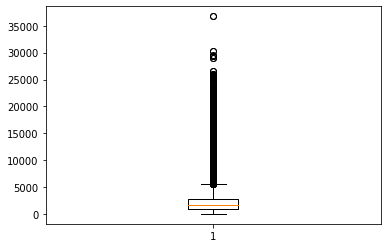

In [22]:
plt.boxplot(merge_total['dist_mts'])
plt.show()

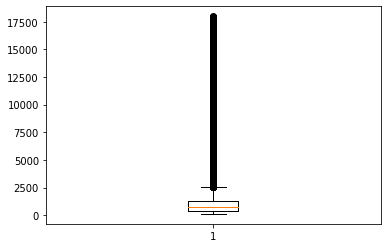

In [23]:
plt.boxplot(merge_total['tripduration'])
plt.show()

In [24]:
#Selecting all those rows where distance travrsed is more than 3 kms & less than 10kms
merge_total.loc[(merge_total['dist_mts'] > 10000)]

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,total_docks,to_latitude,to_longitude,from_latitude,from_longitude,dist_mts,revenue
3829360,18001094,2018-04-01 10:06:16,2018-04-01 11:27:50,2647,4894.0,99,Lake Shore Dr & Ohio St,459,Lakefront Trail & Bryn Mawr Ave,Customer,NaN,NaN,19.0,41.984037,-87.652310,41.892570,-87.614492,10632.487864,8.156667
3829362,18001099,2018-04-01 10:06:37,2018-04-01 11:15:51,2037,4154.0,99,Lake Shore Dr & Ohio St,459,Lakefront Trail & Bryn Mawr Ave,Customer,NaN,NaN,19.0,41.984037,-87.652310,41.892570,-87.614492,10632.487864,6.923333
3829557,18001395,2018-04-01 11:05:14,2018-04-01 12:34:24,377,5350.0,176,Clark St & Elm St,597,Chicago Ave & Washington St,Customer,NaN,NaN,39.0,42.032562,-87.679101,41.902973,-87.631280,14929.656305,8.916667
3829559,18001400,2018-04-01 11:05:41,2018-04-01 12:34:24,3497,5323.0,176,Clark St & Elm St,597,Chicago Ave & Washington St,Customer,NaN,NaN,39.0,42.032562,-87.679101,41.902973,-87.631280,14929.656305,8.871667
3829618,18001485,2018-04-01 11:28:45,2018-04-01 12:23:19,2331,3274.0,459,Lakefront Trail & Bryn Mawr Ave,35,Streeter Dr & Grand Ave,Customer,NaN,NaN,19.0,41.892278,-87.612043,41.984037,-87.652310,10724.975426,5.456667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7043076,21740058,2018-12-30 15:00:34,2018-12-30 16:33:47,1477,5593.0,247,Shore Dr & 55th St,85,Michigan Ave & Oak St,Customer,Female,1984.0,19.0,41.900960,-87.623777,41.795212,-87.580715,12277.862612,9.321667
7043158,21740158,2018-12-30 15:28:07,2018-12-30 16:12:00,764,2633.0,246,Ashland Ave & Belle Plaine Ave,596,Benson Ave & Church St,Subscriber,Male,1981.0,11.0,42.048214,-87.683485,41.956057,-87.668835,10307.889895,4.388333
7043941,21741093,2018-12-31 07:33:45,2018-12-31 08:07:18,1562,2013.0,472,Lincoln Ave & Winona St,66,Clinton St & Lake St,Subscriber,Male,1971.0,15.0,41.885637,-87.641823,41.974911,-87.692503,10770.013009,3.355000
7044343,21741691,2018-12-31 14:25:45,2018-12-31 15:19:35,3304,3230.0,294,Broadway & Berwyn Ave,49,Dearborn St & Monroe St,Subscriber,Male,1946.0,15.0,41.881320,-87.629521,41.978353,-87.659753,11065.512124,5.383333


In [25]:
seriesObj = merge_total.apply(lambda x: True if x['dist_mts'] > 10000 else False , axis=1)
# Count number of True in series
numOfRows = len(seriesObj[seriesObj == True].index)/3192004
print('Number of Rows in dataframe with distance travelled more than 10000 : ', numOfRows)


Number of Rows in dataframe with distance travelled more than 10000 :  0.0052196049879636745


In [34]:
##As percentage of people having trips more than 10kms is less than 0.5% therefore dropping those instances from dataframe
merge_total = merge_total.drop(merge_total[merge_total.dist_mts > 10000].index)


In [37]:
seriesObj = merge_total.apply(lambda x: True if x['dist_mts'] > 5000 else False , axis=1)
# Count number of True in series
numOfRows = len(seriesObj[seriesObj == True].index)/3192004
print('Number of Rows in dataframe with distance travelled more than 5000 : ', numOfRows)


Number of Rows in dataframe with distance travelled more than 5000 :  0.07227058612708505


In [38]:
##As percentage of people having trips more than 5kms is less than 7% therefore dropping those instances from dataframe
merge_total = merge_total.drop(merge_total[merge_total.dist_mts > 5000].index)

In [39]:
seriesObj = merge_total.apply(lambda x: True if x['dist_mts'] > 3000 else False , axis=1)
# Count number of True in series
numOfRows = len(seriesObj[seriesObj == True].index)/3192004
print('Number of Rows in dataframe with distance travelled more than 3000 : ', numOfRows)


Number of Rows in dataframe with distance travelled more than 3000 :  0.14237764113077553


In [40]:
##As percentage of people having trips more than 3kms is less than 14% therefore dropping those instances from dataframe
merge_total = merge_total.drop(merge_total[merge_total.dist_mts > 3000].index)

In [43]:
seriesObj = merge_total.apply(lambda x: True if x['dist_mts'] > 2000 else False , axis=1)
# Count number of True in series
numOfRows = len(seriesObj[seriesObj == True].index)/3192004
print('Number of Rows in dataframe with distance travelled more than 2000 : ', numOfRows)


Number of Rows in dataframe with distance travelled more than 2000 :  0.16592930334673767


In [44]:
##As percentage of people having trips more than 2kms is less than 16% therefore dropping those instances from dataframe
merge_total = merge_total.drop(merge_total[merge_total.dist_mts > 2000].index)

In [45]:
seriesObj = merge_total.apply(lambda x: True if x['tripduration'] > 18000 else False , axis=1)
# Count number of True in series
numOfRows = len(seriesObj[seriesObj == True].index)/3192004
print('Number of Rows in dataframe with distance tripduration is more than 5hrs : ', numOfRows)


Number of Rows in dataframe with distance tripduration is more than 5hrs :  0.0


In [46]:
seriesObj = merge_total.apply(lambda x: True if x['tripduration'] > 10800 else False , axis=1)
# Count number of True in series
numOfRows = len(seriesObj[seriesObj == True].index)/3192004
print('Number of Rows in dataframe with distance tripduration is more than 3hrs : ', numOfRows)


Number of Rows in dataframe with distance tripduration is more than 3hrs :  0.0012346475756296045


In [48]:
##As percentage of people having trips more than 3hrs is less than 0.1% therefore dropping those instances from dataframe
merge_total = merge_total.drop(merge_total[merge_total.tripduration > 10800].index)

In [47]:
seriesObj = merge_total.apply(lambda x: True if x['tripduration'] > 7200  else False , axis=1)
# Count number of True in series
numOfRows = len(seriesObj[seriesObj == True].index)/3192004
print('Number of Rows in dataframe with distance tripduration is more than 2hrs : ', numOfRows)


Number of Rows in dataframe with distance tripduration is more than 2hrs :  0.006064842024007489


In [49]:
##As percentage of people having trips more than 2hrs is less than 0.6% therefore dropping those instances from dataframe
merge_total = merge_total.drop(merge_total[merge_total.tripduration > 7200].index)

In [62]:
merge_total.shape

(1881375, 19)

In [56]:
seriesObj = merge_total.apply(lambda x: True if x['tripduration'] > 3600  else False , axis=1)
# Count number of True in series
numOfRows = len(seriesObj[seriesObj == True].index)/1935878
print('Number of Rows in dataframe with distance tripduration is more than 1 hrs : ', numOfRows)


Number of Rows in dataframe with distance tripduration is more than 1 hrs :  0.02815415020987893


In [60]:
##As percentage of people having trips more than 1hrs is less than 2% therefore dropping those instances from dataframe
merge_total = merge_total.drop(merge_total[merge_total.tripduration > 3600].index)

In [57]:
seriesObj = merge_total.apply(lambda x: True if x['tripduration'] > 1800 else False , axis=1)
# Count number of True in series
numOfRows = len(seriesObj[seriesObj == True].index)/1935878
print('Number of Rows in dataframe with distance tripduration is more than 1/2 hrs : ', numOfRows)


Number of Rows in dataframe with distance tripduration is more than 1/2 hrs :  0.07547118155173002


In [58]:
seriesObj = merge_total.apply(lambda x: True if x['tripduration'] > 900 else False , axis=1)
# Count number of True in series
numOfRows = len(seriesObj[seriesObj == True].index)/1935878
print('Number of Rows in dataframe with distance tripduration is more than 1/2 hrs : ', numOfRows)


Number of Rows in dataframe with distance tripduration is more than 1/2 hrs :  0.1643383519002747


In [59]:
seriesObj = merge_total.apply(lambda x: True if x['tripduration'] > 450 else False , axis=1)
# Count number of True in series
numOfRows = len(seriesObj[seriesObj == True].index)/1935878
print('Number of Rows in dataframe with distance tripduration is more than 1/2 hrs : ', numOfRows)


Number of Rows in dataframe with distance tripduration is more than 1/2 hrs :  0.5254757789488801


In [61]:
merge_total.sort_values(by ='revenue').tail()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,total_docks,to_latitude,to_longitude,from_latitude,from_longitude,dist_mts,revenue
4105773,18329229,2018-05-06 18:33:16,2018-05-06 19:33:16,6343,3600.0,26,McClurg Ct & Illinois St,284,Michigan Ave & Jackson Blvd,Customer,NaN,NaN,31.0,41.877850,-87.624080,41.890359,-87.617532,1491.904571,6.0
5862487,20362847,2018-08-25 13:22:16,2018-08-25 14:22:16,220,3600.0,76,Lake Shore Dr & Monroe St,76,Lake Shore Dr & Monroe St,Customer,NaN,NaN,39.0,41.880958,-87.616743,41.880958,-87.616743,0.000000,6.0
4458541,18741387,2018-06-02 21:32:20,2018-06-02 22:32:20,946,3600.0,6,Dusable Harbor,76,Lake Shore Dr & Monroe St,Customer,NaN,NaN,39.0,41.880958,-87.616743,41.886976,-87.612813,743.771034,6.0
5879712,20382069,2018-08-26 14:38:22,2018-08-26 15:38:22,2394,3600.0,177,Theater on the Lake,177,Theater on the Lake,Customer,NaN,NaN,31.0,41.926277,-87.630834,41.926277,-87.630834,0.000000,6.0
5227585,19634726,2018-07-20 17:05:04,2018-07-20 18:05:04,3119,3600.0,90,Millennium Park,145,Mies van der Rohe Way & Chestnut St,Customer,NaN,NaN,47.0,41.898587,-87.621915,41.881032,-87.624084,1958.141120,6.0


In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV


    Aggregate flows for spatial sankey map

In [67]:
merge_total['trips'] = 1

In [68]:
flows = merge_total.groupby(['from_station_id', 'to_station_id'])['trips'].sum().reset_index()

In [69]:
flows.shape

(21176, 3)

In [70]:
# target,source,flow
flows['target'] = flows.to_station_id.map(lambda s: 's' + str(s))
flows['source'] = flows.from_station_id.map(lambda s: 's' + str(s))
flows['flow'] = flows.trips
flows.head()

,from_station_id,to_station_id,trips,target,source,flow
0,2,2,1044,s2,s2,1044
1,2,3,342,s3,s2,342
2,2,5,25,s5,s2,25
3,2,6,128,s6,s2,128
4,2,7,24,s7,s2,24


In [71]:
flows_concise = flows.query('trips >= 1000')[['target', 'source', 'flow']]
print(flows_concise.shape)
flows_concise.head()

(101, 3)


,target,source,flow
0,s2,s2,1044
72,s3,s3,1225
87,s76,s3,1426
89,s90,s3,1668
214,s6,s6,1066


In [73]:
LAST_TRIP = merge_total['start_time'].max()
LAST_TRIP

'2018-12-31 23:55:04'

In [74]:
station_data.head()

,ID,Station Name,Total Docks,Docks in Service,Status,Latitude,Longitude,Location
0,675,HQ QR,7,7,In Service,41.889914,-87.680343,"(41.88991358344108, -87.68034316599368)"
1,418,Ellis Ave & 53rd St,11,11,In Service,41.799336,-87.600958,"(41.79933626261, -87.6009581145)"
2,249,Montrose Harbor,31,31,In Service,41.963982,-87.638181,"(41.963982, -87.638181)"
3,322,Kimbark Ave & 53rd St,19,19,In Service,41.799568,-87.594747,"(41.799568, -87.594747)"
4,168,Michigan Ave & 14th St,19,19,In Service,41.864059,-87.623727,"(41.864059, -87.623727)"
